In [2]:
#!pip install scipy
import tensorflow as tf
import matplotlib.image as img
import numpy as np
import os
import matplotlib.pyplot as plt
import shutil
#from tensorflow.keras.preprocessing import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import scipy
#Image flow from directory, data image gen
#from skimage import io, color, filters
#from skimage.transform import resize, rotate
print(tf.__version__)
print(tf.test.gpu_device_name())
#!pip install tensorflow_datasets


2.3.1



In [3]:
os.listdir('../data/meta/')

['meta']

FileNotFoundError: [Errno 2] No such file or directory: '../data/images/'

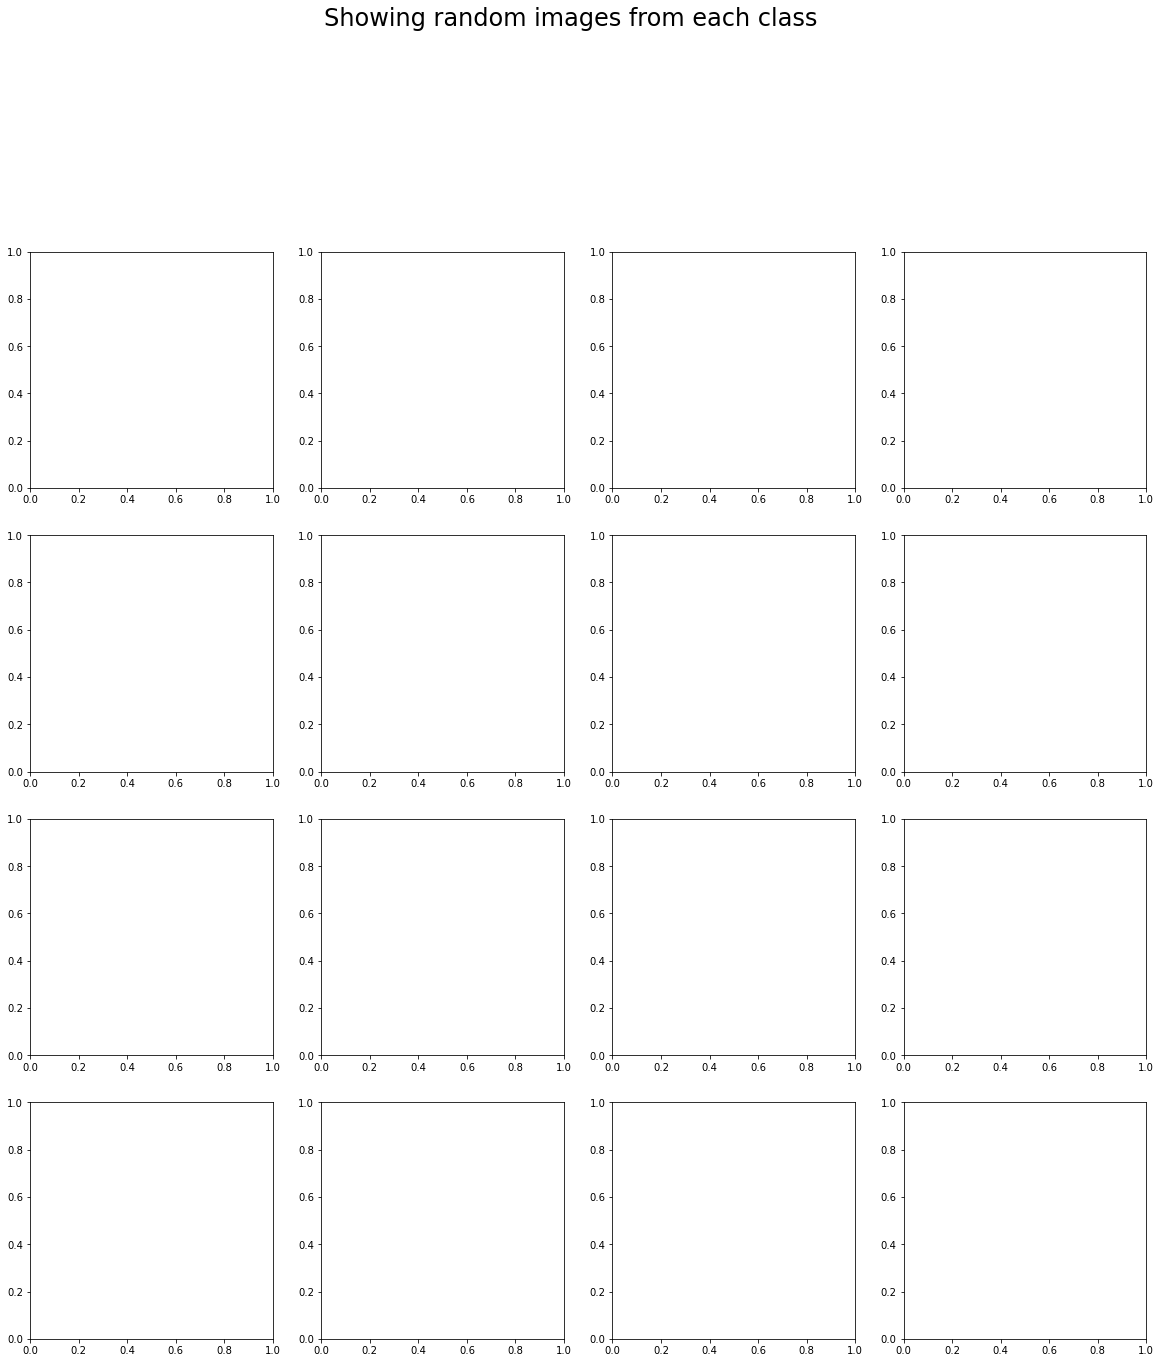

In [4]:
def show_all_images(ax,title,row,col):
    fig, ax = plt.subplots(row,col, figsize=(20,20))
    fig.suptitle(title,fontsize=24, y=1.05)
    data_loc = '../data/images/'
    accum = 0
    sorted_pics = sorted(os.listdir(data_loc))
    for i in range(row):
        for j in range(col):
            food_selected = sorted_pics
            food = food_selected[accum]
            accum +=1 
            # returns the list of all files 
            food_images = os.listdir(os.path.join(data_loc,food)) # joins the dir to food selected
            food_images_random = np.random.choice(food_images) # then choses a random image inside of it 
            img = plt.imread(os.path.join(data_loc,food,food_images_random)) # joins the dir to the random image selected
            # img returns matrix acutally 
            ax[i][j].imshow(img)
            ax[i][j].set_title(food, fontsize=20,pad=5)
    plt.setp(ax, xticks=[],yticks=[])
    plt.tight_layout()



show_all_images(10,'Showing random images from each class', 4,4)



# Splitting into Holdout set and Validation set

In [ ]:
sorted_pics = sorted(os.listdir(data_loc))
sorted_pics[1:].to_numpy()

In [ ]:
#Run this only one time
def test_split(rootdir):
    root_dir = rootdir
    """ #this is commented out to make sure you only run it one time
    # train dirs
    for food in os.listdir(os.path.join(root_dir,'images')):
        os.makedirs(root_dir +'/train/' + food)
    # test dirs
    for food in os.listdir(os.path.join(root_dir,"images")):
        os.makedirs(root_dir + "/test/" + food)
    # var dirs
    for food in os.listdir(os.path.join(root_dir,"images")):
        os.makedirs(root_dir + "/var/" + food)
    """
    food_names = os.listdir(os.path.join(root_dir,'images'))
    for food in food_names:
        currentCls = food
        src = os.path.join(root_dir,'images',currentCls) # Folder to copy images from

        allFileNames = os.listdir(src)
        np.random.shuffle(allFileNames)
        train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                                  [int(len(allFileNames)*0.7), int(len(allFileNames)*0.85)])

        train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]
        val_FileNames = [src+'/' + name for name in val_FileNames.tolist()]
        test_FileNames = [src+'/' + name for name in test_FileNames.tolist()]
        
        print('Total images: ', len(allFileNames))
        print('Training: ', len(train_FileNames))
        print('Validation: ', len(val_FileNames))
    
        for name in train_FileNames:
            shutil.copy(name, root_dir+"/train/"+currentCls)

        for name in val_FileNames:
            shutil.copy(name, root_dir+"/var/"+currentCls)

        for name in test_FileNames:
            shutil.copy(name, root_dir+"/test/"+currentCls)
            
            

#print(test_split('../data'))
    
    

## Grayscaling 



Converting to grayscale allows us to do more things:

Simplify the classification to shape and lighting only
Maintain some semblance of sampling density (RGB features at 33px = 3267)


In [1]:
tf.keras.preprocessing.image.load_img(
    '../data/train/waffles/1005295.jpg', grayscale=True, color_mode="rgb", target_size=(256,256), interpolation="nearest"
)

NameError: name 'tf' is not defined

In [5]:
labels_all= '''apple_pie
baby_back_ribs
baklava
beef_carpaccio
beef_tartare
beet_salad
beignets
bibimbap
bread_pudding
breakfast_burrito
bruschetta
caesar_salad
cannoli
caprese_salad
carrot_cake
ceviche
cheesecake
cheese_plate
chicken_curry
chicken_quesadilla
chicken_wings
chocolate_cake
chocolate_mousse
churros
clam_chowder
club_sandwich
crab_cakes
creme_brulee
croque_madame
cup_cakes
deviled_eggs
donuts
dumplings
edamame
eggs_benedict
escargots
falafel
filet_mignon
fish_and_chips
foie_gras
french_fries
french_onion_soup
french_toast
fried_calamari
fried_rice
frozen_yogurt
garlic_bread
gnocchi
greek_salad
grilled_cheese_sandwich
grilled_salmon
guacamole
gyoza
hamburger
hot_and_sour_soup
hot_dog
huevos_rancheros
hummus
ice_cream
lasagna
lobster_bisque
lobster_roll_sandwich
macaroni_and_cheese
macarons
miso_soup
mussels
nachos
omelette
onion_rings
oysters
pad_thai
paella
pancakes
panna_cotta
peking_duck
pho
pizza
pork_chop
poutine
prime_rib
pulled_pork_sandwich
ramen
ravioli
red_velvet_cake
risotto
samosa
sashimi
scallops
seaweed_salad
shrimp_and_grits
spaghetti_bolognese
spaghetti_carbonara
spring_rolls
steak
strawberry_shortcake
sushi
tacos
takoyaki
tiramisu
tuna_tartare
waffles'''
user_words = labels_all
word_list = user_words.split()
user_words = []
for word in word_list:
    user_words.append(word)
user_words = " ".join(user_words)
class_labels = user_words.split()

Found 3500 images belonging to 5 classes.
Found 750 images belonging to 5 classes.
Found 750 images belonging to 5 classes.
These waffles have been: height_shift_range=0.5,shear_range=0.2, zoom_range=0.2, horizontal_flip=True


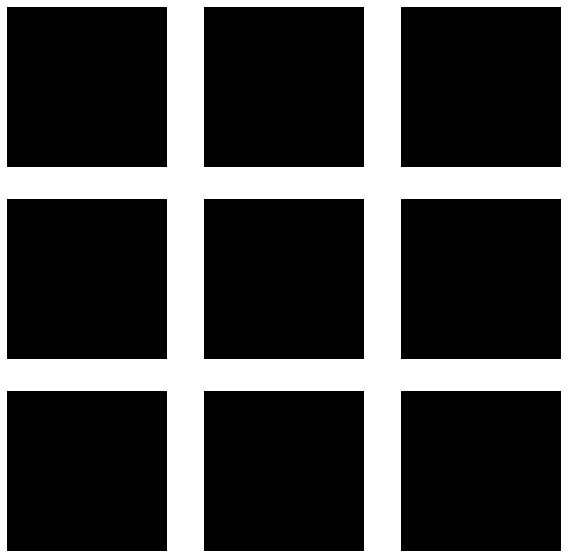

In [6]:
# making only 5 classes

# possible agumentations (rotation_range=90, rescale=1./255,rotation_range=90,height_shift_range=0.5,shear_range=0.1, zoom_range=0.1, horizontal_flip=True))

X5_train_datagen = ImageDataGenerator(rescale=1./255,horizontal_flip=True,shear_range=0.2, zoom_range=0.2)
X5_test_datagen = ImageDataGenerator(rescale=1./255)
X5_var_datagen = ImageDataGenerator(rescale=1./255)

labels_5 = ['apple_pie','waffles','gnocchi','chocolate_mousse','baklava']

X5_train = X5_train_datagen.flow_from_directory(
    '../data/train_mini/',
    target_size=(256,256),
    color_mode="rgb",
    classes=labels_5,
    class_mode="categorical",
    batch_size=32,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix="",
    save_format="png",
    follow_links=False,
    subset=None,
    interpolation="nearest",
)

X5_test = X5_test_datagen.flow_from_directory(
    '../data/test_mini/',
    target_size=(256,256),
    color_mode="rgb",
    classes=labels_5,
    class_mode="categorical",
    batch_size=32,
    shuffle=False,
    seed=None,
    save_to_dir=None,
    save_prefix="",
    save_format="png",
    follow_links=False,
    subset=None,
    interpolation="nearest",
)
X5_var = X5_var_datagen.flow_from_directory(
    '../data/var_mini/',
    target_size=(256,256),
    color_mode="rgb",
    classes=labels_5,
    class_mode="categorical",
    batch_size=32,
    shuffle=False,
    seed=None,
    save_to_dir=None,
    save_prefix="",
    save_format="png",
    follow_links=False,
    subset=None,
    interpolation="nearest",
)

print('These waffles have been: height_shift_range=0.5,shear_range=0.2, zoom_range=0.2, horizontal_flip=True')
from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from matplotlib import pyplot
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
# load the image
img = load_img('../data/train_mini/waffles/1005755.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
#datagen = ImageDataGenerator(height_shift_range=0.5)
# prepare iterator
it = X5_train_datagen.flow(samples, batch_size=1)
# generate samples and plot
pyplot.title(label='These waffles have bee height_shift_range=0.5,shear_range=0.2, zoom_range=0.2, horizontal_flip=True')
for i in range(9):
    # define subplot
    pyplot.subplot( 330 +1 +i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    pyplot.minorticks_off()
    pyplot.imshow(image)
    pyplot.axis('off')
    
# show the figure, works only when rescale 1/255 is off. 
pyplot.show()

# Tensorflow CNN 


In [9]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import os
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


In [11]:
# Getting logs file ready for tensorboard
root_logdir = os.path.join(os.curdir, "my_logs")
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True, monitor = 'val_loss') 
checkpoint_filepath = './CNN/my_5classmodel.h5'
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


In [ ]:
tensorboard dev upload --logdir \
    './my_logs'

### Tensor model 

In [100]:
# Tensor model
num_classes = 5
input_shape=[256,256,3]

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=input_shape),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [101]:
history = model.fit(
        X5_train,
        steps_per_epoch=3500//32,
        epochs=50,
        validation_data=X5_var,
        validation_steps=700//32,callbacks=[checkpoint_cb])

Epoch 1/50
109/109 [==============================] - 50s 457ms/step - loss: 1.5377 - accuracy: 0.3198 - val_loss: 1.4296 - val_accuracy: 0.4152
Epoch 2/50
109/109 [==============================] - 50s 461ms/step - loss: 1.3603 - accuracy: 0.4242 - val_loss: 1.3325 - val_accuracy: 0.4673
Epoch 3/50
109/109 [==============================] - 50s 459ms/step - loss: 1.2874 - accuracy: 0.4706 - val_loss: 1.3726 - val_accuracy: 0.4688
Epoch 4/50
109/109 [==============================] - 48s 440ms/step - loss: 1.2458 - accuracy: 0.4957 - val_loss: 1.2725 - val_accuracy: 0.4613
Epoch 5/50
109/109 [==============================] - 49s 446ms/step - loss: 1.1951 - accuracy: 0.5161 - val_loss: 1.2957 - val_accuracy: 0.4613
Epoch 6/50
109/109 [==============================] - 49s 451ms/step - loss: 1.1443 - accuracy: 0.5421 - val_loss: 1.2870 - val_accuracy: 0.4747
Epoch 7/50
109/109 [==============================] - 49s 452ms/step - loss: 1.1125 - accuracy: 0.5568 - val_loss: 1.2412 - val_ac

KeyboardInterrupt: 

In [128]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


NameError: name 'history' is not defined

In [130]:
X5_test.reset()
predIdxs = history.predict(x=X5_test,
    steps=(750 // 32) + 1)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(X5_test.classes, predIdxs,
    target_names=X5_test.class_indices.keys()))



NameError: name 'history' is not defined

In [108]:
score = model.evaluate(X5_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1]) # this is the one we care about

Test score: 1.873914122581482
Test accuracy: 0.5669642686843872


In [131]:
# loading saved model 
name = keras.models.load_model('./CNN/my_5classmodel.h5')
predictions_ = name.predict(X5_test)


In [127]:
print()
X5_test.reset()
predIdxs = modelw.predict(x=X5_test,
	steps=(750 // 32) + 1)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(X5_test.classes, predIdxs,
	target_names=X5_test.class_indices.keys()))


                  precision    recall  f1-score   support

       apple_pie       0.40      0.24      0.30       150
         waffles       0.47      0.64      0.54       150
         gnocchi       0.59      0.54      0.56       150
chocolate_mousse       0.65      0.61      0.63       150
         baklava       0.49      0.58      0.53       150

        accuracy                           0.52       750
       macro avg       0.52      0.52      0.51       750
    weighted avg       0.52      0.52      0.51       750



[[3 1 4]
 [1 3 0]
 [4 0 2]
 ...
 [4 3 0]
 [4 0 1]
 [4 0 2]]


(array([[ 90.,   0., 205.,   0.,   0., 138.,   0., 141.,   0., 176.],
        [182.,   0., 177.,   0.,   0., 139.,   0., 108.,   0., 144.],
        [248.,   0., 147.,   0.,   0., 143.,   0.,  92.,   0., 120.]]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 3 BarContainer objects>)

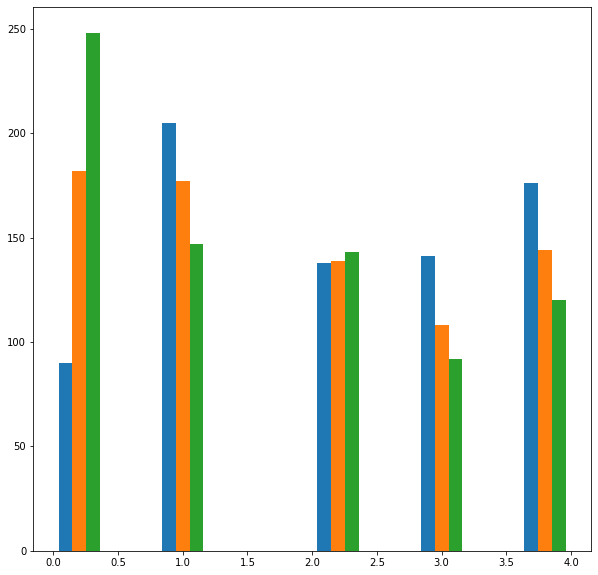

In [133]:
# top 3 of the predictions 
print(np.argsort(predictions_,axis=1)[:,-3:][:,::-1])

fig, ax = plt.subplots()
ax.hist(np.argsort(predictions_,axis=1)[:,-3:][:,::-1])

In [84]:
print(X5_test.class_indices)
X5_test.filepaths

{'apple_pie': 0, 'waffles': 1, 'gnocchi': 2, 'chocolate_mousse': 3, 'baklava': 4}


['../data/test_mini/apple_pie/1028787.jpg',
 '../data/test_mini/apple_pie/1047447.jpg',
 '../data/test_mini/apple_pie/1074942.jpg',
 '../data/test_mini/apple_pie/1174241.jpg',
 '../data/test_mini/apple_pie/1191665.jpg',
 '../data/test_mini/apple_pie/1230465.jpg',
 '../data/test_mini/apple_pie/1232311.jpg',
 '../data/test_mini/apple_pie/1269202.jpg',
 '../data/test_mini/apple_pie/1272958.jpg',
 '../data/test_mini/apple_pie/1284428.jpg',
 '../data/test_mini/apple_pie/129668.jpg',
 '../data/test_mini/apple_pie/1348788.jpg',
 '../data/test_mini/apple_pie/1391393.jpg',
 '../data/test_mini/apple_pie/1410907.jpg',
 '../data/test_mini/apple_pie/1420227.jpg',
 '../data/test_mini/apple_pie/1443243.jpg',
 '../data/test_mini/apple_pie/1444702.jpg',
 '../data/test_mini/apple_pie/1456028.jpg',
 '../data/test_mini/apple_pie/1503274.jpg',
 '../data/test_mini/apple_pie/1526484.jpg',
 '../data/test_mini/apple_pie/1550786.jpg',
 '../data/test_mini/apple_pie/1575505.jpg',
 '../data/test_mini/apple_pie/159

In [95]:
name.evaluate(X5_test)

24/24 [==============================] - 3s 126ms/step - loss: 1.5145 - accuracy: 0.3720


[1.514504075050354, 0.3720000088214874]